<a href="https://colab.research.google.com/github/PeixotoJr/ADD_Python/blob/main/c6_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relações**
<hr>


Muitos conjuntos de dados contêm duas ou mais variáveis, e podemos estar interessados ​​em como essas variáveis ​​se relacionam entre si.
De certo modo muitos dos gráficos que estudamos nos capítulos anteriores podem ser usados e ajudam nessa análise.

Gráficos de linha, ajudam a entender a evolução de uma variável com outra, e no mesmo capítulo vimos o uso dos gráficos de pontos ou dispersão. Gráficos de caixa também podem ser utilizados para representar a distribuição de uma variável com relação a diferentes valores de uma outra variável, e também podemos empregar gráficos de barra ou gráficos emparelhados para apresentar valores com relação a outras quantidades. A divisão entre gráficos para representar Evolução, Distribuições, Quantidades e Proporções e, agora, Relações, ajuda a organizar o conteúdo indicando os gráficos mais comuns para cada propósito, mas de fato os gráficos permitem uma análise muito mais ampla e em geral exibem múltiplos aspectos dos dados.

Os gráficos de dispersão, que vimos no capítulo de Evolução, são talvez o tipo mais empregado para análise de relações entre duas variáveis quantitativas, e você deve notar que muitos dos gráficos anteriores em que representamos relações dos dados tratam de relações entre uma variável quantitativa e categorias apenas. Aqui vamos explorar um pouco mais esse gráfico fazendo representações multidimensionais, empregando cores e diferentes tamanhos dos pontos de dados (gráfico de Bolhas) para representar novas dimensões (classes ou categorias de dados) em gráfico 2D.

O principal risco no uso de gráficos de dispersão é a criação de gráficos com *overplotting*. Um excesso de dados no gráfico em geral não permite identificarmos as relações e, no final, o objetivo da visualização é completamente prejudicado. Correlogramas são simplesmente gráficos de dispersão de diferentes pares de variáveis, e vão permitir separar uma visualização de dados com muitas relações e que são mais fáceis de analisar individualmente.

Por último ainda temos os mapas de calor que podem ser empregados para visualizar uma matriz de correlação dos dados e dados multivariados.



## Gráficos de Dispersão, *Scatter plots*

Basicamente os gráficos de dispersão, gráfico de pontos ou diagramas de dispersão, representam duas variáveis quantitativas, uma para cada eixo, para exibir e podermos identificar alguma relação ou correlação entre esses dados.

A partir dos padrões exibidos você pode, por exemplo, identificar uma correlação positiva entre as variáveis (os valores aumentam em conjunto) ou negativa (um valor diminui à medida que os outros aumentam), pode identificar uma relação linear, ou ainda  um padrão exponencial ou polinomial (por exemplo, a forma de U para polinômios de segundo grau). A força da correlação é expressa pela proximidade (concentração) dos pontos em torno do padrão e dados mais fora do agrupamento indicam a dispersão do padrão e possíveis *outliers*. É também comum, quando identificado esse padrão, adicionarmos uma linha de ajuste ou linha de tendência para inferência de valores, o que pode ser feito por métodos de aproximação, como regressão linear e outras formas de interpolação que empregamos antes no capítulo Evolução.

Um caso especial de relação e de muito interesse são as relações lineares. Correlação é o termo que deve ser empregado para relações lineares entre os dados. O coeficiente de correlação é um número entre $[-1,1]$ e é uma medida da relação linear entre duas variáveis onde $1$ expressa uma relação linear positiva perfeita, $-1$ uma relação linear negativa perfeita e $0$ a ausência de uma relação linear. Identificada uma relação linear é comum querermos aproximar esses dados por uma regressão linear representando também essa aproximação no gráfico de dispersão como vimos antes.

Mas os dados podem exibir muitas outras relações e podemos encontrar relações que são aproximadas por funções exponenciais, polinomiais etc. e, é um erro bastante comum é considerar que um coeficiente de correlação 0 indica *ausência* de relações entre os dados. O coeficiente de correlação 0 indica apenas a *ausência* de relações lineares entre os dados!

> $\bigstar \text{  }$ *Um erro bastante comum é considerar que um coeficiente de correlação $0$ indica a ausência de relações entre os dados. O coeficiente de correlação $0$ indica apenas a ausência de relações lineares entre os dados!*



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

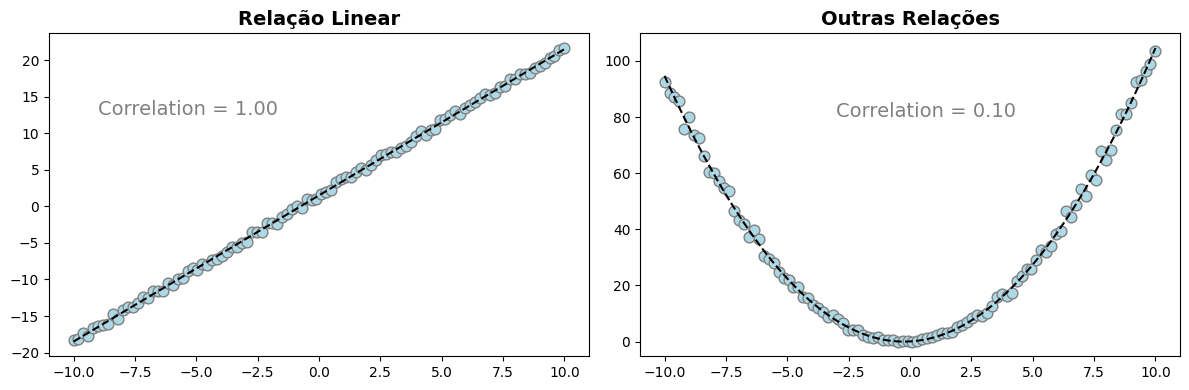

In [ ]:
plt.figure(figsize=(12,4))
np.random.seed(99)
x = np.linspace(-10, 10, 100)
y1 = 2*(x + np.random.rand(len(x))*0.5) + 1
y2 = (x + np.random.rand(len(x))*0.5)**2

plt.subplot(1,2,1)
plt.scatter(x,y1, color='lightblue', s=60, edgecolors='grey')
z = np.polyfit(x, y1, 1)
p = np.poly1d(z)
plt.plot(x,p(x),color='k', linestyle='dashed')
plt.title('Relação Linear', fontsize=14, weight='bold')
plt.text(-9,12.5,f'Correlation = {np.corrcoef(x,y1)[0,1]:.2f}',fontsize=14, color='grey')

plt.subplot(1,2,2)
plt.scatter(x,y2, color='lightblue', s=60, edgecolors='grey')
z = np.polyfit(x, y2, 2)
p = np.poly1d(z)
plt.plot(x,p(x),color='k', linestyle='dashed')
plt.title('Outras Relações', fontsize=14, weight='bold')
plt.text(-3,80,f'Correlation = {np.corrcoef(x,y2)[0,1]:.2f}',fontsize=14, color='grey')

plt.tight_layout()
plt.show()

O primeiro conjunto de dados acima apresenta uma correlação positiva perfeita (valor $1$), enquanto o segundo uma correlação muito baixa ($0.1$) apesar de ter uma relação bastante direta dos valores ($y = x^2$).

Um outro alerta importante sobre relações refere-se a como interpretamos essas relações e dois outros erros são bastante comuns.

> $\bigstar \text{  }$ *O primeiro erro é interpretarmos a presença de uma relação como uma relação de causa-efeito entre as variáveis. Duas variáveis podem estar **relacionadas** mas serem determinadas por outros fatores, por uma ou outras variáveis, que não estão representadas e que talvez você desconheça. Assim, mesmo havendo uma relação entre duas variáveis, uma variável não necessariamente **determina** a outra como numa relação causa-efeito.*

> $\bigstar \text{  }$ *O segundo erro é considerarmos que se não encontramos relações na análise bivariada (duas variáveis) elas não tem então qualquer relação. Assumir isso, entretanto, é desconsiderar a existência de relações conjuntas (uma outra variável que, em conjunto, potencializa uma relação) que são mais difíceis de serem analisadas.*

## Um Gráfico de Dispersão Simples



Gráficos de dispersão podem ser facilmente produzidos com a função `plt.scatter(x,y)` do `Matplotlib` indicando-se apenas as variáveis de interesse `x`e `y` de interesse.

Vamos empregar aqui o data-set `gapminder` e explorar algumas relações entre os dados de desenvolvimento de diferentes países.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/gapminder_2015.csv')
df['cod_continent'] = df[['continent']].astype('category').apply(lambda x: x.cat.codes)
df.head()

NameError: name 'pd' is not defined

O gráfico abaixo mostra o gráfico de pontos para os valores de renda anual por habitante e expectativa de vida, variáveis para as quais esperamos alguma relação. O gráfico pode ser obtido diretamente apenas informando as variáveis envolvidas:

```
plt.scatter(df['income_per_person'],df['LifeExpect']))
```


In [ ]:
plt.scatter(df['income_per_person'],df['LifeExpect'] , alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.show()



NameError: name 'df' is not defined

Essa é uma representação muito simples e, em geral, queremos explorar essa relação em outras dimensões adicionando à visualização dos dados diferentes categorias ou classes com seus valores. Para isso podemos  empregar cores ou diferentes tamanhos dos pontos de dados para adicionar outras dimensões aos dados.

Isso pode ser feito com o `Matplotlib` e você pode, com ele, ter total controle sobre a representação dos dados. Para análises multidimensionais, entretanto, o pacote `Seaborn` em geral oferece uma interface mais simples.

### Adicionando Dimensões com Cores

Vamos então entender melhor como podemos atribuir cores para adicionar novas dimensões a um gráfico 2D.

Já empregamos esquemas de cores antes mas eles tinham um propósito mais ornamental na construção dos gráficos. Aqui, entretanto, eles vão passar a representar valores dos dados permitindo criarmos representações multidimensionais mesmo com gráficos 2D. É essencial então entendermos claramente como atibuir esses valores.

Existem muitas formas de se fazer isso e deixo aqui uma forma que parece bastante útil e flexível, podendo ser empregada em muitas situações. A ideia é criar um dicionário que mapea os valores às cores desejadas. Para as diferentes cores podemos usar os rótulos já conhecidos 'r','g,'b' etc. ou ainda 'red', 'lightblue', 'yellow' etc., mas também podemos empregar os esquemas de cores do `Matplotlib` ou do `Seaborn` que fornecem espectros de cores mais sofisticadas.

Abaixo mostramos como empregar esses 3 esquemas para associar cores diferentes a cada continente do nosso dataset com dados do desenvolvimento dos páises e, assim, adicionar mais essa dimensão à representação dos dados.

#### Esquema de cores 1

Empregando cores básicas.

In [ ]:
dict(zip(df.continent.unique(), ['r','g','b','c','m']))

#### Esquema de cores 2

Empregando o esquema de cores do `Matplotlib`.

In [ ]:
from matplotlib import cm
dict(zip(df.continent.unique(), cm.viridis(len( df.continent.unique() )) ) )

#### Esquema de cores 3

Empregando o esquema de cores do `Seaborn`.

In [ ]:
sns.color_palette("Set2", len(df.continent.unique()))

In [ ]:
dict(zip(df.continent.unique(), sns.color_palette("Set2", len(df.continent.unique()))))

Esses dicionários podem ser então empregados para *mapear* cada valor de `continent` com o método `map`.  

In [ ]:
plt.figure(figsize=(12,4))

colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))
colors2 = dict(zip(df.continent.unique(), cm.viridis(len( df.continent.unique() )) ) )
colors3 = dict(zip(df.continent.unique(), sns.color_palette("Set2", len(df.continent.unique()))))

colors = [ colors1, colors2, colors3 ]

for i in range(len(colors)):
  plt.subplot(1,3,i+1)
  plt.scatter(df['income_per_person'], df['LifeExpect'], alpha=0.8,
              c = df['continent'].map(colors[i]))

  plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
  plt.xlabel('Anual Income per Person')
  plt.ylabel('Life Expectancy (Years)')

plt.tight_layout()
plt.show()


Independente do esquema que você escolher, será inútil empregar diferentes cores se você não puder associar para a cada cor os valores que elas representam. Você pode fazer isso a partir das legendas.

Com o `Matplotlib` a forma mais simples de fazer isso é adicionando camadas de plot dos gráficos para cada dimensão desejada. A cada plot pode ser associado um label que é, então, exibido na legenda ao final. Isso está primeiro gráfico abaixo onde o laço de programa (`for`) percorre cada um dos valores da dimensão `continent` para adicionar uma nova camada de pontos com essa dimensão dos dados no gráfico. Cada nova camada recebe uma cor e um rótulo diferente para representar essa nova dimensão que são exibidos ao final na legenda. Essa forma de construção é a mais simples.

O mesmo gráfico pode ser construído sem uso de iterações plotando todos os pontos e indicando um array de cores para cada ponto como fizemos antes. Essa opção, entretanto, torna a adição de legendas um pouco mais complexa sendo necessário editar a legenda em separado. A construção desse modo encontra-se no segundo gráfico abaixo.

In [ ]:
plt.figure(figsize=(12, 4))
colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'],
              df[ df['continent'] == continent ]['LifeExpect'] ,
              c=df[ df['continent'] == continent ]['continent'].map(colors1),
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy\nCom iterações', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'],
            df['LifeExpect'] ,
            c=df['continent'].map(colors1),
            alpha=0.6)

plt.title('Income $\\times$  Life Expectancy\nSem iterações', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

# Adicionando a legenda
from matplotlib.lines import Line2D
legends = []
for color in colors1.values():
  legends.append( Line2D([0], [0], markerfacecolor=color, marker='o', markersize=8, color='w', alpha=0.6) )

plt.legend(legends, df['continent'].unique())

plt.tight_layout()
plt.show()



Uma alternativa prática pode ser empregar o gráfico sem iterações para obter a figura desejada e, sobre ela, produzir gráficos vazios por meio de iterações adicionando a legenda. Mas é esse um 'truque' de programação que não vamos apresentar embora empreguemos algo semelhante mais adiante para inibir as legendas automáticas do `Seaborn`.



### `Seaborn`, `hue`

O `Seaborn`, mais voltado para análises multidimensionais, já fornece um parâmetro para adição de dimensões de classes de dados aos gráficos de pontos e pode ser uma boa alternativa. O parâmetro `hue` indica a classe de valores em que serão exibidos os dados e pode ser empregado na maior parte dos comandos do `Seaborn`.  

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'],
              df[ df['continent'] == continent ]['LifeExpect'] ,
              c=df[ df['continent'] == continent ]['continent'].map(colors1),
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy\nCom Matplotlib', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
colors = sns.color_palette(['r','g','b','c','m'])

sns.scatterplot(x=df['income_per_person'],
            y=df['LifeExpect'] ,
            hue=df['continent'],
            palette=colors,
            s=60,
            alpha=0.6)

plt.title('Income  $\\times$ Life Expectancy\nCom Seaborn', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.tight_layout()
plt.show()



### Usando `markers`

A adição de novas dimensões (classes de dados) pode ser feita também empregando-se markers no lugar de cores, mas mesmo para poucas classes essa solução facilmente leva ao *overplotting* poluindo facilmente a figura, como você pode ver abaixo, e é necessário uma escolha cuidadosa da representação.

Empregamos abaixo um esquema semelhante ao que empregamos para cores para associar diferentes `markers` a cada valor de `continent`, empregando diretamente o dicionário no parâmetro `marker`.

In [ ]:
dict(zip(df.continent.unique(), ['>','+','x','o','*']))

In [ ]:
markers = dict(zip(df.continent.unique(), ['>','+','x','o','*']))

for continent in  df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'],
              df[ df['continent'] == continent ]['LifeExpect'] ,
              marker=markers[continent],
              s=90,
              c='red',
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')
plt.legend()

plt.show()


## Adicionando Dimensões Contínuas e Gráficos de Bolha

Diferentes tamanhos e cores dos pontos de dados também podem ser empregados para adicionarmos um dimensão de uma variável quantitativa contínua, e não discreta como fizemos até aqui adicionando a dimensão de `continent` aos gráficos.

Em geral, neste caso, empregamos círculos como marcadores e um gráfico de bolhas é um gráfico multivariável que adiciona uma dimensão de uma variável quantitativa a um gráfico de dispersão sendo a área do círculo proporcional a grandeza contínua que representa.

Podemos assim empregar os tamanhos ou cores para, por exemplo, para adicionar as dimensões `SchoolYears15_24` ou `HappyIdx`, que são valores contínuos, ao gráfico de dados de renda e expectativa de vida e explorar conjuntamente essas relações.

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'],
              df['LifeExpect'] ,
              sizes=(40,250),
              s=df['SchoolYears15_24'],
              alpha=0.5)

plt.title('Income X Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

from matplotlib.lines import Line2D
legends = []
valores = np.round( df['SchoolYears15_24'].quantile([0,0.25,0.5,0.75,1]), 0).astype('int')
for size in valores:
  legends.append( Line2D([0], [0], markerfacecolor='blue', marker='o', markersize=size, color='w', alpha=0.5) )

plt.legend( legends,  valores, title='$\\bf{School Years}$')

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'],
              df['LifeExpect'] ,
              sizes=(40,250),
              s=df['HappyIdx'],
              alpha=0.5,
              c='red')

plt.title('Income X Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

from matplotlib.lines import Line2D
legends = []
valores = np.round( df['HappyIdx'].quantile([0,0.25,0.5,0.75,1]), 1)
for size, _ in enumerate(valores):
  legends.append( Line2D([0], [0], markerfacecolor='red', marker='o', markersize=size*4, color='w', alpha=0.5) )

plt.legend( legends,  valores, title='$\\bf{Happy Idx}$')

plt.tight_layout()
plt.show()

Não é surpresa que você pode notar acima uma proximidade muito grande dos padrões de anos de escolaridade e o índice de felicidade dos países. E é exatamente esse o objetivo desses gráficos, fornecer padrões que nos permitem encontrar relações entre os dados. Você pode, em seguida, aprofundar essa exploração com outros gráficos sobre essas variáveis.


Sabendo da semelhança do padrão exibido pelas variáveis `SchoolYears15_24` e `HappyIdx` podemos, por exemplo, produzir um gráfico de bolhas com escalas diferentes para dimensões `SchoolYears15_24` e `HappyIdx` identificando as intersecções e confirmando a semelhança desses padrões ou, ainda, simplesmente construir um gráfico de pontos com as duas variáveis e observar a relação positiva que elas apresentam.

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'],
              df['LifeExpect'] ,
              sizes=(80,800),
              s=df['SchoolYears15_24'],
              alpha=0.6,
              edgecolor='b')
plt.scatter(df['income_per_person'],
              df['LifeExpect'] ,
              sizes=(20,250),
              s=df['HappyIdx'],
              alpha=0.6,
              edgecolor='r',
              c='red')

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.subplot(1,2,2)
plt.scatter(df['SchoolYears15_24'],
              df['HappyIdx'],
              s=60,
              c='r',
              alpha=0.5)

plt.title('School Years $\\times$ Happy Index', fontsize=14, weight='bold')
plt.xlabel('School Years')
plt.ylabel('Happy Index')


bbox_props = dict(boxstyle="rarrow", fc='lightblue', ec='grey', lw=1)
t = plt.text(6, 0.45, 'positive relation', ha="center", va="center", rotation=30,
            size=12, bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

plt.tight_layout()
plt.show()

## Adicionando Dimensões Contínuas com Cores

Diferentes níveis de cores também podem ser empregados para representar a dimensão de variável quantitativa contínua.

Neste caso o mapeamento de cores pode ser feito diretamente com o parâmetro `cmap` associado a um esquema de cores de sua preferência. Como se tratam de  valores contínuos é mais útil empregarmos uma escala de cores no lugar de uma legenda de valores. No `Matplotlib` isso pode ser feito com o comando `colorbar()`.

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'],df['LifeExpect'], alpha=0.6, s=120, c=df['SchoolYears15_24'], cmap=cm.viridis )

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('School Years', fontsize=12, weight='bold')

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'],df['LifeExpect'], alpha=0.6, s=120, c=df['HappyIdx'], cmap=cm.gnuplot2_r)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('Happy Index', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

## Usando o `Seaborn`

De modo semelhante esses mesmos gráficos podem ser produzidos com o pacote `Seaborn`. Para criar gráficos de bolhas você pode empregar os parâmetros `hue` e `size` para associar a uma variável quantitativa ao tamanho dos círculos, o parâmetro `sizes` (com 's' ao final!) indica os diâmetros mínimo e máximo dos círculos a que o valores serão associados proporcionalmente. Você pode verificar que o resultado não será tão bom se você empregar o `size`, sem empregar o parâmetro `hue` que define as classes de valores a serem exibidos.

Já ao empregar uma escala de cores para representar uma nova dimensão de valores contínuos é necessário empregar alguns artifícios para exibir a barra de escala de valores e excluir a legenda automática do `Seaborn`. O artifício consiste em criar um `plot` nulo do `Matplotlib` com a barra de cores e a legenda é excluída em um comando separadamente.

Ao final, o uso do `Matplotlib` ou do `Seaborn` para gráficos de dispersão não parecem apresentar muita diferença para construção de gráficos simples e, para dados multidimensionais, cada um apresenta uma dificuldade particular para o  customização final dos gráficos (as legendas, por exemplo). De qualquer modo  para gráficos multidimensionais mais exploratórios, nos quais você não terá necessidade de ter controle total dos elementos do gráfico, o `Seaborn` parece oferecer uma interface mais simples e ágil de usar.  

## Linha de Ajuste

Você pode retornar ao capítulo de Evolução para verificar detalhes como adicionar linhas de tendências em gráficos de pontos. Lá aplicamos o mesmo procedimento que empregaremos aqui empregando uma função de otimização para o ajuste de curvas do pacote `SciPy`.

O que adicionamos aqui é um artifício bastante comum aplicado a uma série de dados populacionais como renda, mas também aplicável a dados de preços de imóveis e veículos etc. que apresentam uma distribuição exponencial. Relações lineares são sempre mais fáceis de serem empregadas e podemos empregar o artíficio de transformar uma distribuição exponencial aplicando uma transformação de $log( )$ para obter uma relação linear dos dados.

In [ ]:
# Produzindo o ajuste da curva
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.log(x) + b

coefs, covar = curve_fit(func, df['income_per_person'], df['LifeExpect'])

x = np.linspace(df['income_per_person'].min(), df['income_per_person'].max(), 100)
y = func(x,*coefs)

In [ ]:
plt.figure(figsize=(12, 4))
colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'],
              df[ df['continent'] == continent ]['LifeExpect'] ,
              c=df[ df['continent'] == continent ]['continent'].map(colors1),
              label=continent,
              alpha=0.5)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'],
              df[ df['continent'] == continent ]['LifeExpect'] ,
              c=df[ df['continent'] == continent ]['continent'].map(colors1),
              label=continent,
              alpha=0.5)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.xscale('log')

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend(loc='lower right')


plt.tight_layout()
plt.show()

Você pode notar como o primeiro gráfico se ajusta a uma função logarítmica e, alterando a escala de $x$ para uma escala logarítmica, obtemos o ajuste linear. Veja os coeficientes de correlação obtidos em cada caso.

In [ ]:
from IPython.display import display, Math, Latex
Math('\\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(df["income_per_person"],df["LifeExpect"])[0,1]:.3f}')

In [ ]:
Math('\\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(np.log( df["income_per_person"] ),df["LifeExpect"])[0,1]:.3f}')

## Correlogramas

Correlogramas nada mais são do que vários gráficos de pontos de diferentes pares de variáveis para que você possa explorar relações entre elas para cada par. Esse é um modo de evitarmos o *overplotting* e dividirmos o problema em várias partes explorando individualmente cada par de variáveis.

Podemos fazer isso com o `Matplotlib`, mas havendo várias variáveis pode ser necessário fazer um laço de programa para produzir os diferentes gráficos de dispersão de cada par de variável (em geral empregamos somente as quantitativas, numéricas) e logo a seguir você verá um laço de programa como esse. Mas a tarefa pode ser um tando tediosa.

O `Seaborn` fornece uma função para exibir, em um único comando, os diferentes pares de variáveis e é, geralmente, a forma mais simples e empregada para isso. Apenas para fins de apresentação no texto limitamos as variáveis a serem exploradas. De qualquer modo, embora possível, é recomendável evitar execuções do tipo `sns.pairs(df)` e que vão exibir *todas* as relações. Elas levarão muito tempo para serem processadas e, em muitos casos, produzem gráficos desnecessários (variáveis categóricas também serão incluídas neste caso).

In [ ]:
sns.pairplot(df[['income_per_person', 'LifeExpect', 'HappyIdx','SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
            'CPI', 'Population']])
plt.show()

Observando o gráfico acima algumas relações se destacam por apresentar uma relação mais linear como  `LifeExpect` $\times$ `ChildMortality` e `SchoolYears15_24` $\times$ `ChildMortality`.

De fato, essas são relações que apresentam um coeficiente de correlação bastante alto e podemos identificar essas maiores correlações produzindo uma matriz de correlação desses pares de variáveis e identificando seus maiores valores. Fazemos isso a seguir.

In [ ]:
pd.options.display.max_rows = 999
df[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

In [ ]:
df[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr().abs().unstack().drop_duplicates().sort_values(ascending=False).nlargest(5)

Com esses maiores valores de correlação identificados os pares de interesse podemos aprofundar a análise, por exemplo, produzindo as linhas de tendência de dessas variáveis.

Implementamos abaixo um laço de programa de gráficos de pontos do `Matplotlib` que poderia ser facilmente adaptado para produzir correlogramas como o do `Seaborn`.

In [ ]:
plt.figure(figsize=(12, 8))

def linear(x, a, b):
    return a*x + b

for i, pairs in enumerate( [ ['LifeExpect','ChildMortality',],
                ['SchoolYears15_24','ChildMortality'],
                ['CPI','income_per_person'],
                ['Co2Emissions','income_per_person'] ] ):

  coefs, covar = curve_fit(linear, df[pairs[0]], df[pairs[1]])
  x = np.linspace(df[pairs[0]].min(), df[pairs[0]].max(), 100)
  y = linear(x,*coefs)

  plt.subplot(2,2,i+1)
  plt.scatter(df[pairs[0]], df[pairs[1]], alpha=0.5)

  plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

  texto = f'Correlation =  {df[[pairs[0],pairs[1]]].corr().unstack()[1]:.2f} '
  plt.text(( plt.gca().get_xlim()[1] + plt.gca().get_xlim()[0])/2,
           ( plt.gca().get_ylim()[1] + plt.gca().get_ylim()[0])/2,
           texto, ha='center', va='center', fontsize=18, color='red', alpha=0.8)

  plt.title(pairs[0] + ' $\\times$ ' + pairs[1], fontsize=14, weight='bold')
  plt.xlabel(pairs[0])
  plt.ylabel(pairs[1])

plt.tight_layout()
plt.show()

É importante que você note que, embora tenhamos aqui identificado e trabalhado relações lineares dos dados (e que por isso apresentam alto coeficiente de correlação), o correlograma não se limita a apresentar somente relações lineares e poderia ajudar a identificar muitos outros padrões de relacionamento entre os dados.

## Mapas de Calor

Mapas de Calor ou *Heat Maps* permitem visualizar dados multivariados exibindo variáveis ​​discretas (categóricas ou numéricas) nas linhas e colunas e uma dimensão quantitativa colorindo as células do conjunto retangular de linhas e colunas. Os mapas de calor são ótimas representações para mostrar variações de valores em várias variáveis e identificar grupos de dados que apresentam um mesmo padrão de valores.

Um cuidado a ser tomado aqui é na escolha do esquema de cores a ser empregado. Caso você não opte pelo esquema padrão tenha cuidado na escolha do esquema de cores dando preferência aos esquemas cíclicos ou simplesmente sequenciais que permitem mais facilmente associar uma escala de cores a uma escala de valores.

### Mapa de Correlação

Um caso especial muito comum de empregarmos Mapas de Calor é para exibirmos uma matriz de correlação. Esse gráfico pode substituir o Correlograma para a identificação de correlações fortes entre os dados, isto é, relações lineares. Mas podem haver outros padrões de relação nos dados e, neste caso, elas não podem ser identificadas por um Mapa de Correlação sendo mesmo necessário o uso de um Correlograma ou outras análises.

O `Matplotlib` não possui nenhuma função específica para mapas de calor, mas podemos empregar a função de exibição de imagens `imshow()` para construir mapas de calor e basta passar para a função uma matriz de valores. Os rótulos nesse caso precisam ser inseridos manualmente.

O `Seaborn` já tem uma função específica para isso e a função `heatmap` espera receber um `narray` ou `DataFrame` `Pandas` que, neste caso, empregará as informações de índice e coluna para rotular o gráfico.

In [ ]:
plt.figure(figsize=(14,8))

matriz = df[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len( matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len( matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('$\\bf{Correlação}$')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6)

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Em quaisquer dos gráficos acima você pode indentificar, por exemplo, a alta correlação de `ChildMortality` para diversos indicadores e baixa correlação de `Population` do mesmo modo que observamos antes no Correlograma.

### Variáveis Categóricas e uma Dimensão Quantitativa

Um Mapa de Calor é uma representação de uma matriz retangular e, assim, as linhas e colunas correspondem a valores discretos dos dados enquanto uma terceira variável quantitativa corresponde ao valor na linha/coluna que será exibido com alguma cor representando suas quantidades.

Para exemplificar este caso vamos empregar o dataset `mpg` e representar a média dos valores de `mpg` ao longo dos anos por origem dos veículos. Neste exemplo vamos empregar apenas o `Seaborn`.

Boa parte do trabalho para construir um Mapa de Calor está em criar a matriz de dados e, portanto, começamos por ela.

In [ ]:
mpg = sns.load_dataset("mpg")
mpg.head()

As operações abaixo permitem criar uma matriz onde os valores de média de `mpg` são únicos para cada par `origin`/`model_year`, e serão respectivamente as linhas e colunas da nossa matriz. Fazemos essas operações em separado para que você possa entender os dados produzidos e que empregaremos no mapa de calor diretamente.